In [1]:
import pandas as pd
import numpy as np
from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import ndimage
from time import time

In [49]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold
from sklearn.decomposition import PCA

In [66]:
from sklearn.manifold import TSNE
from TSNE import bh_sne

ModuleNotFoundError: No module named 'TSNE'

In [34]:
# from MulticoreTSNE import MulticoreTSNE as TSNE
# %load_ext wurlitzer

# 0 数据准备

## Labeled data

In [35]:
data_lab = pd.read_csv("iBeacon_RSSI_Labeled.csv")
print(data_lab.shape)
print(list(data_lab.columns))

(1420, 15)
['location', 'date', 'b3001', 'b3002', 'b3003', 'b3004', 'b3005', 'b3006', 'b3007', 'b3008', 'b3009', 'b3010', 'b3011', 'b3012', 'b3013']


In [36]:
data_lab.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [37]:
for i in range(2, 15):
    data_lab[data_lab.columns[i]] = data_lab[data_lab.columns[i]] + 200

In [8]:
data_lab.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,0,0,0,0,0,122,0,0,0,0,0,0,0
1,P01,10-18-2016 11:15:19,0,0,0,0,0,122,0,0,0,0,0,0,0
2,P01,10-18-2016 11:15:17,0,0,0,0,0,123,0,0,0,0,0,0,0
3,P01,10-18-2016 11:15:15,0,0,0,0,0,123,0,0,0,0,0,0,0
4,P01,10-18-2016 11:15:13,0,0,0,0,0,123,0,0,0,0,0,0,0


In [9]:
locations = data_lab['location'].tolist()
locations = list(set(locations))
locations?

In [10]:
#将所有105个位置用数字标号
mapping = {}
for i in range(0, 105):
    key = locations[i]
    mapping[key] = i
# mapping

In [11]:
data_lab = data_lab.replace(mapping)
data_lab.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,63,10-18-2016 11:15:21,0,0,0,0,0,122,0,0,0,0,0,0,0
1,104,10-18-2016 11:15:19,0,0,0,0,0,122,0,0,0,0,0,0,0
2,104,10-18-2016 11:15:17,0,0,0,0,0,123,0,0,0,0,0,0,0
3,104,10-18-2016 11:15:15,0,0,0,0,0,123,0,0,0,0,0,0,0
4,104,10-18-2016 11:15:13,0,0,0,0,0,123,0,0,0,0,0,0,0


In [12]:
data_lab = data_lab.drop(['date'], axis=1)
data_lab.head()

,location,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,63,0,0,0,0,0,122,0,0,0,0,0,0,0
1,104,0,0,0,0,0,122,0,0,0,0,0,0,0
2,104,0,0,0,0,0,123,0,0,0,0,0,0,0
3,104,0,0,0,0,0,123,0,0,0,0,0,0,0
4,104,0,0,0,0,0,123,0,0,0,0,0,0,0


In [13]:
X1 = data_lab.drop(['location'], axis=1)
y1 = data_lab['location']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)

## Unlabeled data

In [14]:
data_unlab = pd.read_csv("iBeacon_RSSI_Unlabeled.csv")
print(data_unlab.shape)
print(list(data_unlab.columns))

(5191, 15)
['location', 'date', 'b3001', 'b3002', 'b3003', 'b3004', 'b3005', 'b3006', 'b3007', 'b3008', 'b3009', 'b3010', 'b3011', 'b3012', 'b3013']


In [15]:
locations = data_unlab['location']

In [16]:
data_unlab.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,?,11-7-2016 12:29:01,-200,-200,-80,-200,-77,-56,-81,-200,-200,-200,-200,-200,-200
1,?,11-7-2016 12:29:00,-200,-200,-80,-200,-78,-56,-200,-200,-200,-200,-200,-200,-200
2,?,11-7-2016 12:28:59,-200,-200,-81,-200,-74,-63,-200,-200,-200,-200,-200,-200,-200
3,?,11-7-2016 12:28:58,-200,-200,-200,-200,-75,-56,-200,-200,-200,-200,-200,-200,-200
4,?,11-7-2016 12:28:57,-200,-200,-200,-200,-82,-56,-200,-200,-200,-200,-200,-200,-200


In [17]:
data_unlab = data_unlab.drop(['location','date'], axis=1)

In [18]:
for i in range(0, 13):
    data_unlab[data_unlab.columns[i]] = data_unlab[data_unlab.columns[i]] + 200

In [19]:
data_unlab.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,0,0,120,0,123,144,119,0,0,0,0,0,0
1,0,0,120,0,122,144,0,0,0,0,0,0,0
2,0,0,119,0,126,137,0,0,0,0,0,0,0
3,0,0,0,0,125,144,0,0,0,0,0,0,0
4,0,0,0,0,118,144,0,0,0,0,0,0,0


# 1 分类

## 1.1 SVM

In [20]:
#create a svm classifier
svm_clf = svm.SVC()

# #train the model
svm_clf.fit(X1_train, y1_train)

# #predict the response 
y1_pred = svm_clf.predict(X1_test)

In [54]:
print("score:", svm_clf.score(X1_test, y1_test))

score: 0.33098591549295775


## 1.2 决策树

In [22]:
dt_clf = tree.DecisionTreeRegressor()

dt_clf.fit(X1_train, y1_train)

y1_pred = dt_clf.predict(X1_test)

In [55]:
print("score:", tree.DecisionTreeRegressor.score(dt_clf, X1_test, y1_test))

score: 0.1355290702656332


## 1.3 随机森林

In [24]:
rf = RandomForestClassifier(n_estimators = 500, bootstrap = True)

rf.fit(X1_train, y1_train)

y1_pred = rf.predict(X1_test)

In [56]:
print("score:", rf.score(X1_test, y1_test))

score: 0.3544600938967136


# 2 聚类

## 2.1 DBScan

[https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html]

#### To avoid the dominant effect of fare variable, first normalize variables

In [26]:
#preprocessing data
data_unlab_dbs = StandardScaler().fit_transform(data_unlab)

In [43]:
#聚类
db = DBSCAN(eps=0.3, min_samples=5).fit(data_unlab_dbs)

#核心对象下标标记为True
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)

[ 0  1  1 ... 18 18 18]


In [44]:
#聚类数量（忽略噪声）
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 120
Estimated number of noise points: 606


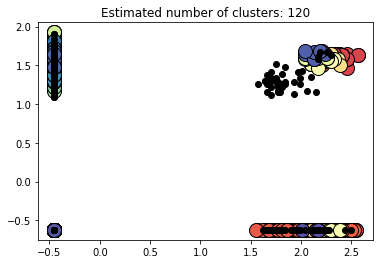

In [45]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data_unlab_dbs[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = data_unlab_dbs[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## 2.2 K-means

https://cloud.tencent.com/developer/article/1010876
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

In [46]:
num_clusters = 10
estimator = KMeans(n_clusters = num_clusters)
estimator.fit(data_unlab)
label_pred = estimator.labels_ #聚类标签
centroid = estimator.cluster_centers_ #聚类中心
inertia = estimator.inertia_ #聚类中心均值向量的集合

### 可视化

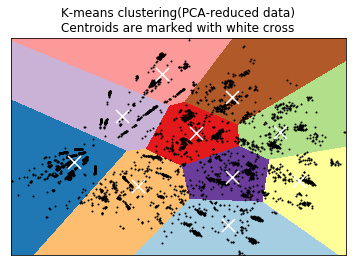

In [53]:
#这个可视化大概要运行几分钟
reduced_data = PCA(n_components=2).fit_transform(data_unlab)
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering(PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## 2.3 GMM

In [58]:
gmm = GaussianMixture(n_components=4).fit(data_unlab)
labels = gmm.predict(data_unlab)

(5191,)

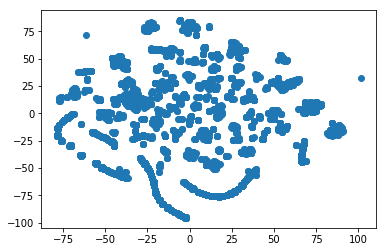

In [67]:
gmm_embedded = TSNE(n_components=2).fit_transform(data_unlab)

plt.scatter(gmm_embedded[:, 0], gmm_embedded[:,1])
plt.show()

## 2.4 层次聚类

[https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage.html]

In [ ]:
#linkage = ward
#minimizes the sum of squared differences within all clusters
ac1 = AgglomerativeClustering(n_clusters=num_clusters).fit(data_unlab)

#maximum or complete linkage
ac2 = AgglomerativeClustering(n_clusters=num_clusters, linkage='complete').fit(data_unlab)

#average linkage
ac3 = AgglomerativeClustering(n_clusters=num_clusters, linkage='average').fit(data_unlab)

# #single linkage
# ac4 = AgglomerativeClustering(n_clusters=num_clusters, linkage='single').fit(data_unlab)

In [ ]:
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(locations[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [ ]:
data_unlab_red = manifold.SpectralEmbedding(n_components=2).fit_transform(data_unlab)

for linkage in ('ward', 'average', 'complete'):#????'singles'会报错
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    t0 = time()
    clustering.fit(data_unlab_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(data_unlab_red, clustering.labels_, "%s linkage" % linkage)

plt.show()